# <center> Проект</center>
Перед началом выполнения проекта, необходимо изменить имя вашего ноутбука/ПК на вашу фамилию на английском языке (например: **Ivanov**). Затем <font color='red'> **обязательно выполнить код в ячейках ниже (их 4)**</font> (*в случае не выполнения, будут вычиляться 5 баллов из проекта*). В случае если модуль `datetime` не установлен нужно установить.

In [1]:
import os
os.getlogin()

'simko'

In [2]:
import socket
socket.gethostbyname(socket.gethostname())

'25.61.31.132'

In [4]:
!whoami

simko


In [6]:
from datetime import datetime

current_time = datetime.now()
print(current_time)
print("Simko S.E.") # написать здесь свою фамилию и инициалы

2022-12-14 18:19:22.411827
Simko S.E.


Скачайте таблицы в формате .csv из pgadmin и далее считайте данные таблицы.

**Предобработка данных и их изучения.**
1.	Выведите по 5 строк с каждой таблицы.
2.	Введите информацию о каждой таблицы и изучите их (возможно есть какие-то странности. Опишите полученные данные.
3.	Проверьте данные на пропуски и дубликаты.
4.	Вычислите сводную (описательную) статистику о данных датафреймов (таблиц) и выведите ее.
5.	Если в некоторых столбцах нужно изменить данные, измените их и аргументируйте зачем их стоит изменить (например, дата должна иметь тип данных datetime64, а не object).
**Задания:**
1.	Найдите все параметры ПК, имеющие 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене. 
2.	Для каждого производителя, выпускающего лаптоты c объёмом жесткого диска не менее 10 Гбайт и ОЗУ не менее 64 мб, найти скорости таких лаптопов. Выведите производителей и скорость. *Нарисуйте график зависимости скоростей от полученных моделей ноутбуков.*
3.	Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены.
4.	Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000; *Нарисуйте график зависимости цен от всех производителей ноутбуков.*
5.	Найдите для каждой модели ПК их количество и максимальное и минимальное ram, сгруппируйте по моделям; переименуйте колонки макс. и мин. в “max/min_ram”;
6.	Проверти гипотезу: «Самые дорогие ноутбуки у производителя А». Опишите полученный результат.
7.	Постройте матрицы корреляции для всех таблиц. Необязательно, но, если будет желание, нарисовать график тепловой карты матриц корреляции используя функцию heatmap из библиотеки seaborn.
8.	Нарисуйте график (*не графики, на одном графики должно отображаться всё*) зависимости цены ноутбук/ПК от объёма жесткого диска. Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.
9.	Найдите: 
    a.	количество товаров каждого типа у каждого производителя; постройте график pie, на должно отображаться доля каждого производителя.
    b.	самый дорогой товар каждого типа, вывести тип и цену;
    c.	производителей, делающих ноутбуки и пк ценой более 600 долларов, но которые не производят принтеры, вывести производителя.
10.	Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’ ;
11.	Найти производителей, делающих ноутбуки и ПК, но не принтеры;
12.	Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно;
13.	Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.)

# Предобработка данных и их изучения.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Выведите по 5 строк с каждой таблицы.

In [3]:
printer = pd.read_csv("printer.csv")
printer.head()

,code,model,color,type,price
0,1,1276,n,Laser,400.0
1,2,1433,y,Jet,270.0
2,3,1434,y,Jet,290.0
3,4,1401,n,Matrix,150.0
4,5,1408,n,Matrix,270.0


In [4]:
pc = pd.read_csv("pc.csv")
pc.head()

,code,model,speed,ram,hd,cd,price
0,1,1232,500,64,5,12x,600.0
1,10,1260,500,32,10,12x,350.0
2,11,1233,900,128,40,40x,980.0
3,12,1233,800,128,20,50x,970.0
4,2,1121,750,128,14,40x,850.0


In [5]:
laptop = pd.read_csv("laptop.csv")
laptop.head()

,code,model,speed,ram,hd,price,screen
0,1,1298,350,32,4,700.0,11
1,2,1321,500,64,8,970.0,12
2,3,1750,750,128,12,1200.0,14
3,4,1298,600,64,10,1050.0,15
4,5,1752,750,128,10,1150.0,14


In [6]:
product = pd.read_csv("product.csv")
product.head()

,maker,model,type
0,A,1232,PC
1,A,1233,PC
2,A,1276,Printer
3,A,1298,Laptop
4,A,1401,Printer


# Выведите информацию о каждой таблице и изучите ее (возможно есть какие-то странности). Опишите полученные данные.

In [7]:
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      int64  
 1   model   6 non-null      int64  
 2   color   6 non-null      object 
 3   type    6 non-null      object 
 4   price   6 non-null      float64
dtypes: float64(1), int64(2), object(2)
memory usage: 368.0+ bytes


In [8]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    12 non-null     int64  
 1   model   12 non-null     int64  
 2   speed   12 non-null     int64  
 3   ram     12 non-null     int64  
 4   hd      12 non-null     int64  
 5   cd      12 non-null     object 
 6   price   12 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 800.0+ bytes


In [9]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    6 non-null      int64  
 1   model   6 non-null      int64  
 2   speed   6 non-null      int64  
 3   ram     6 non-null      int64  
 4   hd      6 non-null      int64  
 5   price   6 non-null      float64
 6   screen  6 non-null      int64  
dtypes: float64(1), int64(6)
memory usage: 464.0 bytes


In [10]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   16 non-null     object
 1   model   16 non-null     int64 
 2   type    16 non-null     object
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


#### Моделей в таблице product 16 штук, при этом всего моделей по всем таблицам 24. Это связано с различными характеристиками у одинаковых моделей.

# Проверьте данные на пропуски и дубликаты.

In [90]:
printer.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [91]:
pc.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [92]:
laptop.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [93]:
product.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [12]:
pd.isnull(product)

,maker,model,type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [13]:
pd.isnull(pc)

,code,model,speed,ram,hd,cd,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [14]:
pd.isnull(laptop)

,code,model,speed,ram,hd,price,screen
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False


In [15]:
pd.isnull(printer)

,code,model,color,type,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False


#### Везде False, пропусков и дубликатов в таблицах нет.

# Вычислите сводную (описательную) статистику о данных датафреймов (таблиц) и выведите ее.

In [16]:
printer.describe()

,code,model,price
count,6.000000,6.000000,6.000000
mean,3.500000,1373.333333,296.666667
std,1.870829,72.060160,94.162979
min,1.000000,1276.000000,150.000000
25%,2.250000,1316.250000,270.000000
50%,3.500000,1404.500000,280.000000
75%,4.750000,1426.750000,372.500000
max,6.000000,1434.000000,400.000000


In [17]:
pc.describe()

,code,model,speed,ram,hd,price
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,1206.916667,608.333333,88.000000,13.666667,675.000000
std,3.605551,52.397880,153.494645,43.417634,9.670323,261.342687
min,1.000000,1121.000000,450.000000,32.000000,5.000000,350.000000
25%,3.750000,1204.250000,500.000000,56.000000,8.000000,387.500000
50%,6.500000,1232.000000,550.000000,96.000000,10.000000,725.000000
75%,9.250000,1233.000000,750.000000,128.000000,15.500000,875.000000
max,12.000000,1260.000000,900.000000,128.000000,40.000000,980.000000


In [18]:
laptop.describe()

,code,model,speed,ram,hd,price,screen
count,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000
mean,3.500000,1452.833333,566.666667,80.000000,9.00000,1003.333333,13.000000
std,1.870829,231.131492,163.299316,39.191836,2.75681,177.951304,1.549193
min,1.000000,1298.000000,350.000000,32.000000,4.00000,700.000000,11.000000
25%,2.250000,1298.000000,462.500000,64.000000,8.50000,955.000000,12.000000
50%,3.500000,1309.500000,550.000000,64.000000,10.00000,1010.000000,13.000000
75%,4.750000,1642.750000,712.500000,112.000000,10.00000,1125.000000,14.000000
max,6.000000,1752.000000,750.000000,128.000000,12.00000,1200.000000,15.000000


In [19]:
product.describe()

,model
count,16.000000
mean,1464.500000
std,305.022622
min,1121.000000
25%,1272.000000
50%,1361.000000
75%,1513.000000
max,2113.000000


# Если в некоторых столбцах нужно изменить данные, измените их и аргументируйте зачем их стоит изменить (например, дата должна иметь тип данных datetime64, а не object).

In [176]:
laptop["model"] = laptop["model"].astype(object)
pc["model"] = pc["model"].astype(object)
printer["model"] = printer["model"].astype(object)

# Модель нужно преобразовать из числа к простому объекту, так как 
# никаких вычислений с моделью нам не требуется (кроме задания, в котором strange_sum),
# а matplotlib, считая модель числом, строит странные графики.

# Задания

# Найдите все параметры ПК, имеющие 8x или 40x CD и цену более 600. Отсортируйте по скорости и цене.

In [107]:
new_pc = pc.query('(cd == "8x" or cd == "40x") and price > 600')
new_pc.sort_values(by = ["speed", "price"])

,code,model,speed,ram,hd,cd,price
6,4,1121,600,128,14,40x,850.0
7,5,1121,600,128,8,40x,850.0
4,2,1121,750,128,14,40x,850.0
2,11,1233,900,128,40,40x,980.0


# Для каждого производителя, выпускающего лаптоты c объёмом жесткого диска не менее 10 Гбайт и ОЗУ не менее 64 мб, найти скорости таких лаптопов. Выведите производителей и скорость. Нарисуйте график зависимости скоростей от полученных моделей ноутбуков.

In [174]:
new_lap = laptop.query('hd >= 10 and ram >= 64')
new_lap = pd.merge(new_lap, product)[["maker", "speed", "model"]]
new_lap

,maker,speed,model
0,B,750,1750
1,A,600,1298
2,A,450,1298
3,A,750,1752


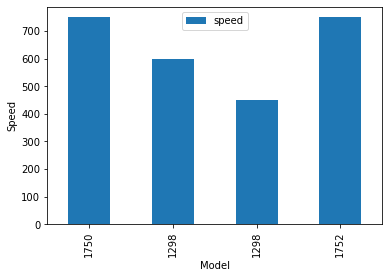

In [183]:
new_lap.plot.bar(x = "model", y = "speed")
plt.ylabel("Speed")
plt.xlabel("Model")
plt.locator_params(axis = 'x', nbins = 4)
plt.show()

# Найдите номера моделей, тип и цены всех ноутбуков производителя А. Отсортируйте по убыванию цены. Постройте гистограмму изменения цены.

In [117]:
new_lap = pd.merge(laptop, product)
new_lap = new_lap[new_lap["maker"] == "A"][["model", "type", "price"]]
new_lap.sort_values("price", ascending = 0, inplace = True)
new_lap

,model,type,price
5,1752,Laptop,1150.0
1,1298,Laptop,1050.0
2,1298,Laptop,950.0
0,1298,Laptop,700.0


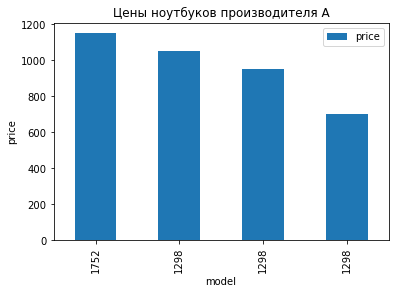

In [118]:
new_lap.plot.bar(x = "model",
                 xlabel = "model",
                 y = "price",
                 ylabel = "price",
                 title = "Цены ноутбуков производителя А")
plt.show()

# Найдите производителя, номер модели и цену среди ноутбуков с наибольшей стоимостью до 1000; Нарисуйте график зависимости цен от всех производителей ноутбуков.

In [26]:
new_lap = laptop[laptop["price"] < 1000]
new_lap = new_lap[new_lap["price"] == max(new_lap["price"])]
new_lap = pd.merge(new_lap, product, on = "model")
new_lap[["maker", "model", "price"]]

,maker,model,price
0,C,1321,970.0


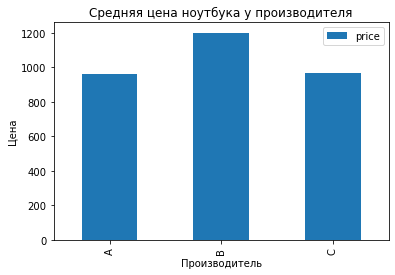

In [264]:
lp_prod = pd.merge(laptop, product, on = "model")
lp_prod_pt = pd.pivot_table(
    lp_prod,
    index = "maker",
    values = "price",
    aggfunc = np.mean
)
lp_prod_pt.plot.bar()
plt.xlabel("Производитель")
plt.ylabel("Цена")
plt.title("Средняя цена ноутбука у производителя")
plt.show()

# Найдите для каждой модели ПК их количество и максимальное и минимальное ram, сгруппируйте по моделям; переименуйте колонки макс. и мин. в “max/min_ram”;

In [208]:
pc_maxmin_ram = pd.pivot_table(
    pc,
    index = ["model"],
    values = ["ram"],
    aggfunc = [max, min]
)
pc_maxmin_ram.columns = ["max_ram", "min_ram"]
pc_maxmin_ram["Кол-во моделей"] = pc[["model", "code"]].groupby("model").count() # Колонка code только чтобы положить туда count

pc_maxmin_ram

,max_ram,min_ram,Кол-во моделей
model,,,
1121,128,128,3
1232,64,32,4
1233,128,64,4
1260,32,32,1


# Проверти гипотезу: «Самые дорогие ноутбуки у производителя А». Опишите полученный результат.

In [209]:
avg_lp_price =  pd.pivot_table(
    pd.merge(laptop, 
             product, 
             on = "model"),
    index = "maker",
    values = "price",
    aggfunc = np.mean
)

avg_lp_price

,price
maker,
A,962.5
B,1200.0
C,970.0


Как видим, наибольшая средняя цена ноутбука у производителя В, а у производителя А она наименьшая.
Гипотеза опровергнута.

# Постройте матрицы корреляции для всех таблиц. Необязательно, но, если будет желание, нарисовать график тепловой карты матриц корреляции используя функцию heatmap из библиотеки seaborn.

In [14]:
laptop.corr()

,code,model,speed,ram,hd,price,screen
code,1.000000,0.194492,0.360060,0.392792,0.659232,0.492616,0.414039
model,0.194492,1.000000,0.872024,0.952037,0.560904,0.752311,0.493203
speed,0.360060,0.872024,1.000000,0.950000,0.799671,0.954369,0.830098
ram,0.392792,0.952037,0.950000,1.000000,0.770054,0.908486,0.632456
hd,0.659232,0.560904,0.799671,0.770054,1.000000,0.929516,0.749269
price,0.492616,0.752311,0.954369,0.908486,0.929516,1.000000,0.819788
screen,0.414039,0.493203,0.830098,0.632456,0.749269,0.819788,1.000000


In [15]:
pc.corr()

,code,model,speed,ram,hd,price
code,1.000000,0.504053,0.262822,-0.083624,0.526679,-0.051133
model,0.504053,1.000000,-0.185278,-0.591091,0.086596,-0.441972
speed,0.262822,-0.185278,1.000000,0.818463,0.859476,0.884962
ram,-0.083624,-0.591091,0.818463,1.000000,0.547365,0.955008
hd,0.526679,0.086596,0.859476,0.547365,1.000000,0.622303
price,-0.051133,-0.441972,0.884962,0.955008,0.622303,1.000000


In [16]:
printer.corr()

,code,model,price
code,1.000000,-0.035605,-0.079472
model,-0.035605,1.000000,-0.762028
price,-0.079472,-0.762028,1.000000


In [17]:
product.corr()

,model
model,1.0


# Нарисуйте график зависимости цены ноутбук/ПК от объёма жесткого диска. Опишите ваши наблюдения, существует ли какая-то зависимость и т.п.

In [167]:
pc_hd = pc[["hd", "price"]].sort_values("hd")
lp_hd = laptop[["hd", "price"]].sort_values("hd")

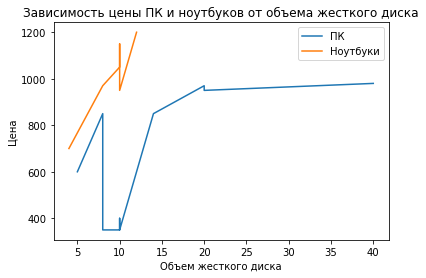

In [168]:
plt.plot(pc_hd["hd"], pc_hd["price"])
plt.plot(lp_hd["hd"], lp_hd["price"])
plt.title("Зависимость цены ПК и ноутбуков от объема жесткого диска")
plt.xlabel("Объем жесткого диска")
plt.ylabel("Цена")
plt.legend(["ПК", "Ноутбуки"])
plt.show()

Как видим, с повышением объема жесткого диска цена возрастает.

# Найдите: a. количество товаров каждого типа у каждого производителя; постройте график pie, на должно отображаться доля каждого производителя. b. самый дорогой товар каждого типа, вывести тип и цену; c. производителей, делающих ноутбуки и пк ценой более 600 долларов, но которые не производят принтеры, вывести производителя.

In [266]:
# a. Найдите количество товаров каждого типа у каждого производителя;
makers = {
    maker: {"pc": 0, "laptops": 0, "printers": 0}
    for maker in "ABCDE"
}

new_pc = pd.merge(pc, product, on = "model")
new_lap = pd.merge(laptop, product, on = "model")
new_print = pd.merge(printer, product, on = "model")
new_print = new_print.rename({"type_x": "printer_type", "type_y": "type"}, axis = 1)

for k, v in makers.items():
    v["pc"] += len(new_pc[new_pc["maker"] == k])
    v["laptops"] += len(new_lap[new_lap["maker"] == k])
    v["printers"] += len(new_print[new_print["maker"] == k])

makers_df = pd.DataFrame(makers)

makers_df

,A,B,C,D,E
pc,8,3,0,0,1
laptops,4,1,1,0,0
printers,3,0,0,2,1


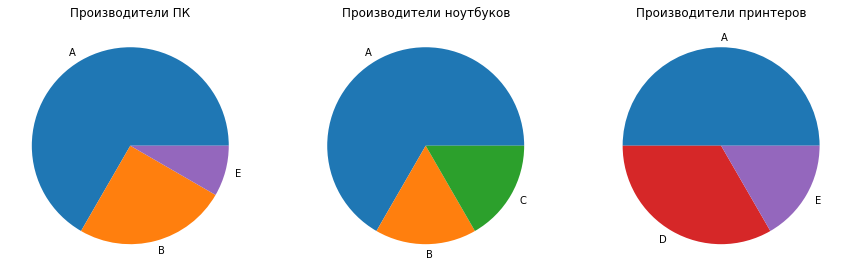

In [212]:
# постройте график pie, на должно отображаться доля каждого производителя.
plt.figure(figsize = (15, 15))

plt.subplot(131)
makers_df.loc["pc"].plot.pie(ylabel = '', title = "Производители ПК")

plt.subplot(132)
makers_df.loc["laptops"].plot.pie(ylabel = '', title = "Производители ноутбуков")

plt.subplot(133)
makers_df.loc["printers"].plot.pie(ylabel = '', title = "Производители принтеров")

plt.show()

In [156]:
# b. самый дорогой товар каждого типа, вывести тип и цену

max_pc = new_pc[new_pc["price"] == max(new_pc["price"])]
max_lap = new_lap[new_lap["price"] == max(new_lap["price"])]
max_print = new_print[new_print["price"] == max(new_print["price"])]

max_price = pd.concat([max_pc, max_lap, max_print])[["type", "price"]]
max_price = max_price.set_index("type")

max_price.drop_duplicates() # Был дубликат принтера с одинаковой ценой

,price
type,
PC,980.0
Laptop,1200.0
Printer,400.0


In [84]:
# c. производителей, делающих ноутбуки и пк ценой более 600 долларов, 
#    но которые не производят принтеры, вывести производителя.

all_products = pd.concat([new_pc, new_lap, new_print])
all_products.index = range(24)

pc_makers = set(list(all_products[all_products["type"] == "PC"]["maker"]))
laptop_makers = set(list(all_products[all_products["type"] == "Laptop"]["maker"]))
printer_makers = set(list(all_products[all_products["type"] == "Printer"]["maker"]))

makers = all_products.query('price > 600 and maker in (@pc_makers & @laptop_makers) and not maker in @printer_makers')["maker"]
set(list(makers))

{'B'}

# Выведите новую цену каждого ноутбука и ПК получив её как модель+цена+ram. Дайте колонке название ‘strange_sum’ 

In [122]:
pc_and_lp = pd.concat([pc, laptop])
pc_and_lp["model"] = pc_and_lp["model"].astype(int)
strange_sum = [
    pc_and_lp.iloc[i]["model"] + pc_and_lp.iloc[i]["price"] + pc_and_lp.iloc[i]["ram"]
    for i in range(len(pc_and_lp))
]
pc_and_lp["strange_sum"] = strange_sum

pc_and_lp

,code,model,speed,ram,hd,cd,price,screen,strange_sum
0,1,1232,500,64,5,12x,600.0,NaN,1896.0
1,10,1260,500,32,10,12x,350.0,NaN,1642.0
2,11,1233,900,128,40,40x,980.0,NaN,2341.0
3,12,1233,800,128,20,50x,970.0,NaN,2331.0
4,2,1121,750,128,14,40x,850.0,NaN,2099.0
5,3,1233,500,64,5,12x,600.0,NaN,1897.0
6,4,1121,600,128,14,40x,850.0,NaN,2099.0
7,5,1121,600,128,8,40x,850.0,NaN,2099.0
8,6,1233,750,128,20,50x,950.0,NaN,2311.0
9,7,1232,500,32,10,12x,400.0,NaN,1664.0


# Найти производителей, делающих ноутбуки и ПК, но не принтеры;

In [77]:
(pc_makers & laptop_makers) - printer_makers

{'B'}

# Найдите производителя ПК и модель, чья цена ниже средней цены ноутбука, а ram и скорость больше в 1.5 и 1.2 раза соответственно

In [88]:
avg_lp_price = np.mean(laptop["price"])
avg_lp_ram = np.mean(laptop["ram"]) 
avg_lp_speed = np.mean(laptop["speed"])

new_pc.query('price < @avg_lp_price and ram > @avg_lp_ram * 1.5 and speed > @avg_lp_speed * 1.2')[["maker", "model"]]

,maker,model
5,A,1233
6,A,1233
8,A,1233
9,B,1121


# Написать общий вывод о полученных результатах (какие важные закономерности были вами обнаружены или получены и т.п.)

1. Производитель А производит больше всего моделей товаров. Наверное, самый старший из представленных.
2. Производитель D делает только принтеры. Узкая специализация, позволяющая сосредоточить все внимание на ней.
3. Производитель С производит только одну модель ноутбука. Слабовато.
4. Самая высокая средняя цена у ноутбуков, самая низкая у принтеров.
5. Самые дорогие ПК и ноутбуки у производителя В, самые дорогие принтеры у D.
6. Среди ПК есть экземпляры с идентичными параметрами, а в некоторых из таких "пар" отличается скорость или цена. Причем у таких "пар" и производители одинаковые. Вызывает вопросы. (см. таблицы ниже)

In [252]:
left_strange_codes = [1, 12, 2]
right_strange_codes = [3, 6, 4]

In [253]:
pd.merge(pc, product).query('code in @left_strange_codes')

,code,model,speed,ram,hd,cd,price,maker,type
0,1,1232,500,64,5,12x,600.0,A,PC
6,12,1233,800,128,20,50x,970.0,A,PC
9,2,1121,750,128,14,40x,850.0,B,PC


In [254]:
pd.merge(pc, product).query('code in @right_strange_codes')

,code,model,speed,ram,hd,cd,price,maker,type
7,3,1233,500,64,5,12x,600.0,A,PC
8,6,1233,750,128,20,50x,950.0,A,PC
10,4,1121,600,128,14,40x,850.0,B,PC
